In [53]:
import numpy as np
% matplotlib inline
from matplotlib import pyplot as plt

In [54]:
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

#Associated output labels - First 2 examples are labeled '-1' and last 3 are labeled '+1'
y = np.array([-1,-1,1,1,1])

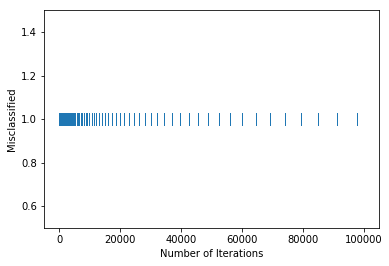

In [55]:
def svm_sgd(X,Y):
    iterations = 100000
    learning_rate = 1
    w = np.zeros(len(X[0]))
    errors = []
    for iteration in range(1,iterations):
        error = 0
        for i,x in enumerate(X):
            if (Y[i] * np.dot(X[i],w)) < 1:
                w = w + (learning_rate * (Y[i] * X[i] + (-2 * 1 / iteration * w) ))
                error = 1
            else:
                w = w + (learning_rate * (-2 * 1/iteration * w))
                
        errors.append(error)
    
    plt.plot(errors,'|',markersize = 12)
    plt.ylabel('Misclassified')
    plt.xlabel('Number of Iterations')
    plt.ylim(0.5,1.5)
    plt.show()
    return w
    
    
w = svm_sgd(X,y)

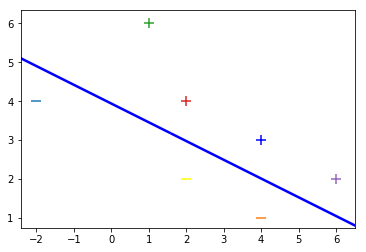

In [56]:

for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')